In [2]:
!pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
df1 = pd.read_csv('Combined_News_DJIA.csv')

In [6]:
df1.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,08-08-2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,11-08-2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,12-08-2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,13-08-2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,14-08-2008,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [7]:
df1.shape

(1989, 27)

In [8]:
df2 = pd.read_csv('Value_DJIA.csv')

In [9]:
df2.shape

(1989, 7)

In [10]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,08-08-2008,11432.08984,11759.95996,11388.04004,11734.32031,11734.32031,212830000
1,11-08-2008,11729.66992,11867.11035,11675.53027,11782.34961,11782.34961,183190000
2,12-08-2008,11781.70020,11782.34961,11601.51953,11642.46973,11642.46973,173590000
3,13-08-2008,11632.80957,11633.78027,11453.33984,11532.95996,11532.95996,182550000
4,14-08-2008,11532.07031,11718.28027,11450.88965,11615.92969,11615.92969,159790000


In [11]:
merge = pd.merge(df1, df2, on='Date', how='inner')


In [12]:
merge

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Adj Close,Volume
0,08-08-2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.08984,11759.95996,11388.04004,11734.32031,11734.32031,212830000
1,11-08-2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.66992,11867.11035,11675.53027,11782.34961,11782.34961,183190000
2,12-08-2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.70020,11782.34961,11601.51953,11642.46973,11642.46973,173590000
3,13-08-2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.80957,11633.78027,11453.33984,11532.95996,11532.95996,182550000
4,14-08-2008,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.07031,11718.28027,11450.88965,11615.92969,11615.92969,159790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,27-06-2016,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes 

In [13]:
merge.shape

(1989, 33)

In [14]:
headlines = []
for row in range(0,len(merge.index)):
    headlines.append(' '.join(str(x) for x in merge.iloc[row, 2:27] ))

In [15]:
headlines[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [16]:
clean_headlines=[]
for i in range(0,len(headlines)):
    clean_headlines.append(re.sub("b[(')]",'',headlines[i]))
    clean_headlines[i] = re.sub('b[(")]','',clean_headlines[i])
    clean_headlines[i] = re.sub("\'",'',clean_headlines[i])

In [17]:
clean_headlines[0]

'Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran: S

In [18]:
merge['Combined_News'] = clean_headlines

In [19]:
merge['Combined_News'][0]

'Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran: S

In [20]:
merge.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Open,High,Low,Close,Adj Close,Volume,Combined_News
0,08-08-2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.08984,11759.95996,11388.04004,11734.32031,11734.32031,212830000,Georgia downs two Russian warplanes as countri...
1,11-08-2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.66992,11867.11035,11675.53027,11782.34961,11782.34961,183190000,Why wont America and Nato help us? If they won...
2,12-08-2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.70020,11782.34961,11601.51953,11642.46973,11642.46973,173590000,Remember that adorable 9-year-old who sang at ...
3,13-08-2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.80957,11633.78027,11453.33984,11532.95996,11532.95996,182550000,U.S. refuses Israel weapons to attack Iran: r...
4,14-08-2008,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.07031,11718.28027,11450.88965,11615.92969,11615.92969,159790000,All the experts admit that we should legalise ...


In [21]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity 

In [22]:
merge['Subjectivity']=merge['Combined_News'].apply(getSubjectivity)
merge['Polarity']=merge['Combined_News'].apply(getPolarity)

In [23]:
merge.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top25,Open,High,Low,Close,Adj Close,Volume,Combined_News,Subjectivity,Polarity
0,08-08-2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,"b""No Help for Mexico's Kidnapping Surge""",11432.08984,11759.95996,11388.04004,11734.32031,11734.32031,212830000,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568
1,11-08-2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b""So this is what it's come to: trading sex fo...",11729.66992,11867.11035,11675.53027,11782.34961,11782.34961,183190000,Why wont America and Nato help us? If they won...,0.374806,0.121956
2,12-08-2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.70020,11782.34961,11601.51953,11642.46973,11642.46973,173590000,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302
3,13-08-2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.80957,11633.78027,11453.33984,11532.95996,11532.95996,182550000,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398
4,14-08-2008,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Philippines : Peace Advocate say Muslims nee...,11532.07031,11718.28027,11450.88965,11615.92969,11615.92969,159790000,All the experts admit that we should legalise ...,0.375099,0.040677


In [24]:
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [25]:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0
for i in range(0,len(merge['Combined_News'])):
    SIA = getSIA(merge['Combined_News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

In [26]:
merge['Compound']=compound
merge['Negative']=neg
merge['Neutral']=neu
merge['Positive']=pos

In [27]:
merge.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Close,Adj Close,Volume,Combined_News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,08-08-2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,11734.32031,11734.32031,212830000,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9982,0.235,0.724,0.041
1,11-08-2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,11782.34961,11782.34961,183190000,Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9858,0.191,0.721,0.089
2,12-08-2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,11642.46973,11642.46973,173590000,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9715,0.128,0.816,0.056
3,13-08-2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,11532.95996,11532.95996,182550000,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398,-0.9809,0.146,0.788,0.066
4,14-08-2008,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,11615.92969,11615.92969,159790000,All the experts admit that we should legalise ...,0.375099,0.040677,-0.9882,0.189,0.717,0.094


In [28]:
keep_columns=['Open','High','Low','Volume','Subjectivity','Polarity','Compound','Negative','Neutral','Positive','Label','Close']
df=merge[keep_columns]
df

,Open,High,Low,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Label,Close
0,11432.08984,11759.95996,11388.04004,212830000,0.267549,-0.048568,-0.9982,0.235,0.724,0.041,0,11734.32031
1,11729.66992,11867.11035,11675.53027,183190000,0.374806,0.121956,-0.9858,0.191,0.721,0.089,1,11782.34961
2,11781.70020,11782.34961,11601.51953,173590000,0.536234,-0.044302,-0.9715,0.128,0.816,0.056,0,11642.46973
3,11632.80957,11633.78027,11453.33984,182550000,0.364021,0.011398,-0.9809,0.146,0.788,0.066,0,11532.95996
4,11532.07031,11718.28027,11450.88965,159790000,0.375099,0.040677,-0.9882,0.189,0.717,0.094,1,11615.92969
...,...,...,...,...,...,...,...,...,...,...,...,...
1984,17355.21094,17355.21094,17063.08008,138740000,0.352311,-0.014015,-0.9644,0.148,0.758,0.094,0,17140.24023
1985,17190.50977,17409.72070,17190.50977,112190000,0.352649,0.046560,-0.9571,0.132,0.767,0.102,1,17409.72070
1986,17456.01953,17704.50977,17456.01953,106380000,0.389617,0.052622,-0.9975,0.225,0.684,0.091,1,17694.67969
1987,17712.75977,17930.60938,17711.80078,133030000,0.382566,0.011243,-0.9977,0.202,0.738,0.061,1,17929.99023


In [29]:
df1=df.reset_index()['Close']
df1[:60]

0     11734.320310
1     11782.349610
2     11642.469730
3     11532.959960
4     11615.929690
5     11659.900390
6     11479.389650
7     11348.549810
8     11417.429690
9     11430.209960
10    11628.059570
11    11386.250000
12    11412.870120
13    11502.509770
14    11715.179690
15    11543.959960
16    11516.919920
17    11532.879880
18    11188.230470
19    11220.959960
20    11510.740230
21    11230.730470
22    11268.919920
23    11433.709960
24    11421.990230
25    10917.509770
26    11059.019530
27    10609.660160
28    11019.690430
29    11388.440430
30    11015.690430
31    10854.169920
32    10825.169920
33    11022.059570
34    11143.129880
35    10365.450200
36    10850.660160
37    10831.070310
38    10482.849610
39    10325.379880
40     9955.500000
41     9447.110352
42     9258.099609
43     8579.190430
44     8451.190430
45     9387.610352
46     9310.990234
47     8577.910156
48     8979.259766
49     8852.219727
50     9265.429688
51     9033.660156
52     8519.

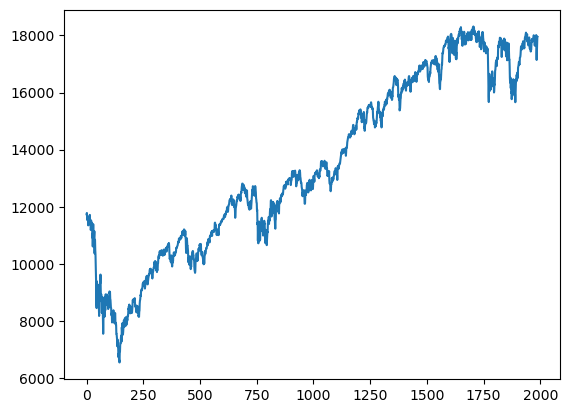

In [30]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [31]:
!pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable


In [32]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np

from sklearn.preprocessing import MinMaxScaler



In [33]:
df1.shape

(1989,)

In [34]:
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [35]:
df1.shape

(1989, 1)

In [36]:
df1[:60]

array([[0.4408942 ],
       [0.44497647],
       [0.43308732],
       [0.42377949],
       [0.43083154],
       [0.43456885],
       [0.41922626],
       [0.40810547],
       [0.41395995],
       [0.41504621],
       [0.43186252],
       [0.41130982],
       [0.41357241],
       [0.42119137],
       [0.43926733],
       [0.42471444],
       [0.42241616],
       [0.42377269],
       [0.39447907],
       [0.39726092],
       [0.42189092],
       [0.39809137],
       [0.4013373 ],
       [0.4153437 ],
       [0.41434757],
       [0.37146905],
       [0.38349673],
       [0.34530324],
       [0.38015394],
       [0.41149599],
       [0.37981395],
       [0.36608545],
       [0.36362059],
       [0.3803553 ],
       [0.39064572],
       [0.32454652],
       [0.36578714],
       [0.36412209],
       [0.33452493],
       [0.32114072],
       [0.28970263],
       [0.24649184],
       [0.2304268 ],
       [0.17272263],
       [0.16184322],
       [0.24143462],
       [0.23492226],
       [0.172

In [37]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [38]:
training_size,test_size

(1292, 697)

In [39]:
len(train_data),len(test_data)

(1292, 697)

In [40]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [41]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [42]:
print(X_train)


[[0.4408942  0.44497647 0.43308732 ... 0.16731347 0.16462591 0.18030416]
 [0.44497647 0.43308732 0.42377949 ... 0.16462591 0.18030416 0.18948366]
 [0.43308732 0.42377949 0.43083154 ... 0.18030416 0.18948366 0.21143804]
 ...
 [0.70484571 0.69304413 0.70414707 ... 0.76348665 0.77599882 0.7725658 ]
 [0.69304413 0.70414707 0.71624871 ... 0.77599882 0.7725658  0.75680256]
 [0.70414707 0.71624871 0.71581775 ... 0.7725658  0.75680256 0.75257744]]


In [43]:
print(X_train.shape), print(y_train.shape)

(1191, 100)
(1191,)


(None, None)

In [44]:
print(X_test.shape), print(ytest.shape)

(596, 100)
(596,)


(None, None)

In [45]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [46]:
X_train[1]

array([[0.44497647],
       [0.43308732],
       [0.42377949],
       [0.43083154],
       [0.43456885],
       [0.41922626],
       [0.40810547],
       [0.41395995],
       [0.41504621],
       [0.43186252],
       [0.41130982],
       [0.41357241],
       [0.42119137],
       [0.43926733],
       [0.42471444],
       [0.42241616],
       [0.42377269],
       [0.39447907],
       [0.39726092],
       [0.42189092],
       [0.39809137],
       [0.4013373 ],
       [0.4153437 ],
       [0.41434757],
       [0.37146905],
       [0.38349673],
       [0.34530324],
       [0.38015394],
       [0.41149599],
       [0.37981395],
       [0.36608545],
       [0.36362059],
       [0.3803553 ],
       [0.39064572],
       [0.32454652],
       [0.36578714],
       [0.36412209],
       [0.33452493],
       [0.32114072],
       [0.28970263],
       [0.24649184],
       [0.2304268 ],
       [0.17272263],
       [0.16184322],
       [0.24143462],
       [0.23492226],
       [0.17261381],
       [0.206

In [47]:
import tensorflow as tf # This code has been tested with TensorFlow 1.6



In [48]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [49]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
X_train

array([[[0.4408942 ],
        [0.44497647],
        [0.43308732],
        ...,
        [0.16731347],
        [0.16462591],
        [0.18030416]],

       [[0.44497647],
        [0.43308732],
        [0.42377949],
        ...,
        [0.16462591],
        [0.18030416],
        [0.18948366]],

       [[0.43308732],
        [0.42377949],
        [0.43083154],
        ...,
        [0.18030416],
        [0.18948366],
        [0.21143804]],

       ...,

       [[0.70484571],
        [0.69304413],
        [0.70414707],
        ...,
        [0.76348665],
        [0.77599882],
        [0.7725658 ]],

       [[0.69304413],
        [0.70414707],
        [0.71624871],
        ...,
        [0.77599882],
        [0.7725658 ],
        [0.75680256]],

       [[0.70414707],
        [0.71624871],
        [0.71581775],
        ...,
        [0.7725658 ],
        [0.75680256],
        [0.75257744]]])

In [52]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

19/19 [==============================] - 14s 281ms/step - loss: 0.0419 - val_loss: 0.0388
Epoch 2/100
19/19 [==============================] - 4s 193ms/step - loss: 0.0044 - val_loss: 0.0082
Epoch 3/100
19/19 [==============================] - 3s 169ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 4/100
19/19 [==============================] - 3s 156ms/step - loss: 8.0561e-04 - val_loss: 0.0011
Epoch 5/100
19/19 [==============================] - 3s 156ms/step - loss: 7.5581e-04 - val_loss: 0.0010
Epoch 6/100
19/19 [==============================] - 3s 169ms/step - loss: 7.5057e-04 - val_loss: 0.0012
Epoch 7/100
19/19 [==============================] - 3s 159ms/step - loss: 7.7069e-04 - val_loss: 0.0012
Epoch 8/100
19/19 [==============================] - 3s 153ms/step - loss: 7.2328e-04 - val_loss: 0.0010
Epoch 9/100
19/19 [==============================] - 3s 173ms/step - loss: 7.2787e-04 - val_loss: 0.0011
Epoch 10/100
19/19 [==============================] - 3s 156ms/st

19/19 [==============================] - 4s 191ms/step - loss: 4.1759e-04 - val_loss: 0.0011
Epoch 75/100
19/19 [==============================] - 3s 187ms/step - loss: 3.0237e-04 - val_loss: 3.8390e-04
Epoch 76/100
19/19 [==============================] - 4s 194ms/step - loss: 3.0933e-04 - val_loss: 5.0518e-04
Epoch 77/100
19/19 [==============================] - 5s 255ms/step - loss: 3.1625e-04 - val_loss: 5.6894e-04
Epoch 78/100
19/19 [==============================] - 4s 223ms/step - loss: 2.9275e-04 - val_loss: 3.9341e-04
Epoch 79/100
19/19 [==============================] - 4s 232ms/step - loss: 2.7696e-04 - val_loss: 3.6580e-04
Epoch 80/100
19/19 [==============================] - 4s 227ms/step - loss: 2.8146e-04 - val_loss: 7.8631e-04
Epoch 81/100
19/19 [==============================] - 4s 223ms/step - loss: 2.8859e-04 - val_loss: 3.8079e-04
Epoch 82/100
19/19 [==============================] - 4s 206ms/step - loss: 2.8143e-04 - val_loss: 3.9805e-04
Epoch 83/100
19/19 [=======

In [53]:
import tensorflow as tf

In [54]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

19/19 [==============================] - 1s 36ms/step


In [55]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [56]:
len(train_predict),len(test_predict),len(y_train),len(ytest)

(1191, 596, 1191, 596)

In [57]:
train_predict

array([[ 8523.7705],
       [ 8563.018 ],
       [ 8650.501 ],
       ...,
       [15673.676 ],
       [15655.308 ],
       [15591.671 ]], dtype=float32)

In [58]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11881.242447300976

In [59]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

17325.545911768113

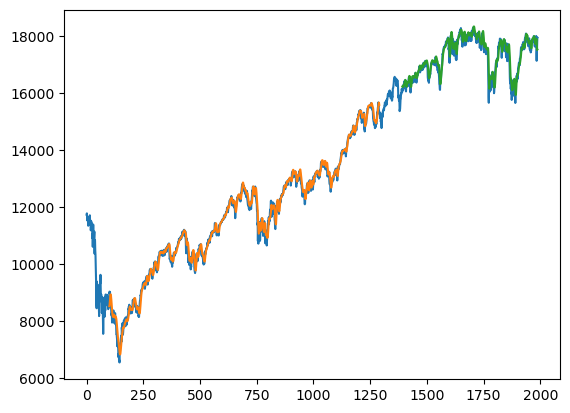

In [60]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Predict next 30 days values

In [61]:
len(test_data)

697

In [62]:
x_input=test_data[597:].reshape(1,-1)
x_input.shape

(1, 100)

In [63]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [64]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>354):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        print(x_input.shape)
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

(1, 100)
[0.95841074]
101
(1, 100, 1)
[0.95841074]
102
(1, 100, 1)
[0.95841074]
103
(1, 100, 1)
[0.95841074]
104
(1, 100, 1)
[0.95841074]
105
(1, 100, 1)
[0.95841074]
106
(1, 100, 1)
[0.95841074]
107
(1, 100, 1)
[0.95841074]
108
(1, 100, 1)
[0.95841074]
109
(1, 100, 1)
[0.95841074]
110
(1, 100, 1)
[0.95841074]
111
(1, 100, 1)
[0.95841074]
112
(1, 100, 1)
[0.95841074]
113
(1, 100, 1)
[0.95841074]
114
(1, 100, 1)
[0.95841074]
115
(1, 100, 1)
[0.95841074]
116
(1, 100, 1)
[0.95841074]
117
(1, 100, 1)
[0.95841074]
118
(1, 100, 1)
[0.95841074]
119
(1, 100, 1)
[0.95841074]
120
(1, 100, 1)
[0.95841074]
121
(1, 100, 1)
[0.95841074]
122
(1, 100, 1)
[0.95841074]
123
(1, 100, 1)
[0.95841074]
124
(1, 100, 1)
[0.95841074]
125
(1, 100, 1)
[0.95841074]
126
(1, 100, 1)
[0.95841074]
127
(1, 100, 1)
[0.95841074]
128
(1, 100, 1)
[0.95841074]
129
(1, 100, 1)
[0.95841074]
130
[[0.9584107398986816], [0.9584107398986816], [0.9584107398986816], [0.9584107398986816], [0.9584107398986816], [0.9584107398986816], 

In [65]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [66]:
import matplotlib.pyplot as plt


In [67]:
len(df1)

1989

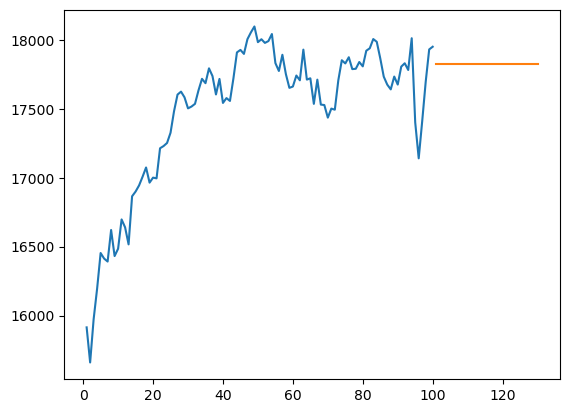

In [68]:
plt.plot(day_new,scaler.inverse_transform(df1[1889:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

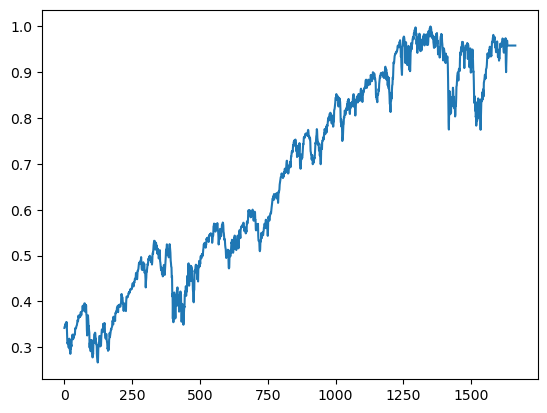

In [69]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[355:])

In [70]:
df3=scaler.inverse_transform(df3).tolist()

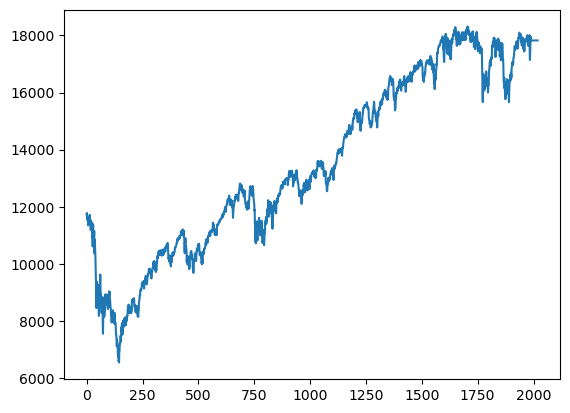

In [71]:
plt.plot(df3)